In [ ]:
import requests, time, pandas as pd
from bs4 import BeautifulSoup 
if 0:
    FDA_Approved_Drugs_Index = []
    for i in ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0-9']:
        r=requests.get(f'https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=browseByLetter.page&productLetter={i}')
        soup = BeautifulSoup(r.text, 'lxml') 
        table = soup.find_all('table')
        if len(table) != 1: raise
        drug_T = []
        for li in table[0].tbody.find_all('li'): 
            try: 
                t = li.text
                _1, _2, dosage_form_route, company = t.split('|')  
                drug_name, active_ingredients = _1.split('(',1)
                drug_name = drug_name.strip()
                active_ingredients = active_ingredients.strip()[:-1] 
                type_, ApplNo = _2.split('#')
                type_ = type_.strip()
                ApplNo = ApplNo.strip()
                dosage_form_route = dosage_form_route.strip()
                company = company.strip()
                drug_T.append([drug_name, active_ingredients, type_, ApplNo, company, dosage_form_route])
            except: 
                print(i, ':', li) 
        df = pd.DataFrame(drug_T, columns=['Drug Name', 'Active Ingredients', 'Type', 'ApplNo', 'Company', 'Dosage Form/Route'])
        FDA_Approved_Drugs_Index.append(df)
        time.sleep(1)
    
    pd.concat(FDA_Approved_Drugs_Index).to_csv('FDA_Approved_Drugs_Index.csv', index=False)

In [ ]:
for year in range(1900,2022):
    for month in range(1,13):  
        r=requests.get(f'https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=1&reportSelectMonth={month}&reportSelectYear={year}&nav#navigation')
        with open(f'fda/FDA_Approved_Drugs_Index_by_date_{year}_{month}.html', 'w') as fw: fw.write(r.text)

In [ ]:
import os, requests, pandas as pd
from bs4 import BeautifulSoup 
dfs = []
for html in os.listdir('fda'):
    with open(f'fda/{html}', 'r') as fr:  
        soup = BeautifulSoup(fr.read(), 'lxml')  
        table = soup.table
        tbody = table.tbody
        if tbody:   
            l = []
            for tr in table.find_all('tr'):
                l.append( [cell.text.strip() for cell in tr.find_all(["th", "td"])] ) 
            df = pd.DataFrame(l[1:], columns=l[0])  
            dfs.append(df) 
pd.concat(dfs).to_csv('FDA_Approved_Drugs_Index.csv', index=False)

In [ ]:
import requests, pandas as pd, datetime
from bs4 import BeautifulSoup 
df_index = pd.read_csv('FDA_Approved_Drugs_Index.csv')
df_index = df_index[df_index['Drug Name'].notna()]
df_index = df_index[df_index['Active Ingredients'].notna()]

df_index['ADate'] = df_index.apply(lambda row: datetime.datetime.strptime(row['Approval Date'], '%m/%d/%Y'), axis=1)

df_index = df_index.sort_values(by='ADate')

table_1 = '''Amoxicillin						|		PBP													|				Anti-infective |
Cefaclor/Ceclor					|		PBP													|	Anti-infective      |
Ceftriaxone/Rocephin			|		PBP													|	Anti-infective      |
Cefuroxime axetil/ceftin		|		PBP													|	Anti-infective      |
Cephalexin/keflex				|		PBP													|	Anti-infective      |
D-cycloserine/seromycin			|		Alanine racemase									|	Anti-infective      |
Fosfomycin/monurol				|		UDP-N-acetylglucosamine-3-enolpyruvyltransferase	|	Anti-infective      |
Isoniazid						|		Enol-acyl carrier protein reductase					|	Anti-infective      |
Meropenem						|		PBP													|	Anti-infective      |
Omnicef							|		PBP													|	Anti-infective      |
Penicillin V					|		PBP													|	Anti-infective      |
Azacitidine						|		Methyltranferase									|	Cancer				|
Bortezomib						|		Protesome											|	Cancer				|
Decitabine/azadC				|		Methyltranferase									|	Cancer				|
Dutasteride/avodart				|		5-α-Reductase										|	Cancer				|
Exemestane/Aromasin				|		Aromatase											|	Cardio-vascular		|
Floxuridine						|		Thymidylate synthase								|	Cardio-vascular		|
Gemcitabine/gemzar				|		Ribonucleoside reductatase							|	Cardio-vascular		|
Proscar/finasteride				|		5-α-Reductase										|	Cardio-vascular		|
Rasagiline						|		MAO-B												|	Parkinson’s disease	|
Selegiline						|		MAO-B												|	Parkinson’s disease	|
Warfarin						|		Vitamin K reductase									|	Cardio-vascular		|
Vigabatrin/sabril				|		GABA-Aminotransferase								|	Anti-epileptic		|
Nexium/esomeprazole				|		H+/K+ ATPase										|	Gastro-intestinal	|
Orlistat						|		Lipase												|	Gastro-intestinal	|
Prevacid/lansoprazole			|		H+/K+ATPase											|	Gastro- intestinal	|
Prilosec/omeprazole				|		H+/K+ATPase											|	Gastro-intestinal	|
Protonix/pantoprazole			|		H+/K+ATPase											|	Gastro-intestinal	|
Aciphex/rabeprazol				|		H+/K+ATPase											|	Gastro-intestinal	|
Aspirin 						|		Cyclooxygenase										|	Inflammation		|
Disulfiram/antabuse				|		Aldehyde dehydrogenase								|	Chronic alcoholism	|
Eflornithine					|		Ornithine decarboxylase								|	Hirsutism			|
Propylthiouracil/procasil		|		Thyroxine-5-deiodinase								|	Hyperthyroidism		|
Saxagliptin/Onglyza				|		DPP-IV												|	Anti-diabetic drug	|
Phenoxybenzamine hydrochloride	|		α-Adrenoceptor										|	Cardio-vascular		|
mercaptopurine/purinthol		|		Purine-nucleotide synthesis							|	Cancer				|
Carbidopa/lodosyn				|		DOPA decarboxylase									|	CNS                 |
Telaprevir						|		α-Ketoamide											|	Anti-HCV			|	2011
Boceprevir						|		α-Ketoamide											|	Anti-HCV			|	2011
Abiraterone						|		—													|	Cancer				|	2011
Afatinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2013
Dimethyl fumarate				|		α,β-Unsaturated carbonyl							|	Multiple sclerosis	|	2013
Ibrutinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2014
Osimertinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2015
Olmutinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2015
Narlaprevir						|		α-Ketoamide											|	Anti-HCV			|	2016
Acalabrutinib					|		α,β-Unsaturated propargylamide						|	Cancer				|	2017
Neratinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2017
Dacomitinib						|		α,β-Unsaturated carbonyl							|	Cancer				|	2018
Selinexor						|		α,β-Unsaturated carbonyl							|	Cancer				|	2019
Zanubrutinib					|		α,β-Unsaturated carbonyl							|	Cancer				|	2019
Voxelotor						|		Hemoglobin											|	Sickle Cell Disease	|	'''
# Vildagliptin/Eugreas			|		DPP-IV  |				Anti-diabetic drug # Not approved by FDA

app_date = []
for line in table_1.splitlines(): 
    drug_names = line.split('|')[0].strip().upper().split('/')  
    
    ds = [] 
    for drug_name in drug_names:
        df_1 = df_index[df_index['Drug Name'].str.contains(drug_name)]  
        df_2 = df_index[df_index['Active Ingredients'].str.contains(drug_name)]   
        ds.extend(df_1['ADate'])
        ds.extend(df_2['ADate'])
    ds = sorted(ds) 
    name, _, Therapeutic_area, year = line.split('|')
    if ds:   
        app_date.append([ds[0].year, name.strip(), Therapeutic_area.strip()])
    else:
        app_date.append([int(year), name.strip(), Therapeutic_area.strip()]) 

app_date = sorted(app_date,key=lambda x:x[0])
df = pd.DataFrame(app_date, columns=['Approval Year', 'Drug Name', 'Therapeutic Area'])
df.to_csv('FDA_Approved_Covalent_Drugs.csv', index=False)

In [1]:
import requests, pandas as pd, datetime
from bs4 import BeautifulSoup 
df = pd.read_csv('FDA_Approved_Covalent_Drugs.csv') 
# Table 1 of 10.1039/D0MD00154F (2020)
# table 1 of 10.3390/molecules20021984 (2015)
df

,Approval Year,Drug Name,Therapeutic Area
0,1947,Propylthiouracil/procasil,Hyperthyroidism
1,1950,Aspirin,Inflammation
2,1951,Disulfiram/antabuse,Chronic alcoholism
3,1952,Isoniazid,Anti-infective
4,1953,Phenoxybenzamine hydrochloride,Cardio-vascular
5,1953,mercaptopurine/purinthol,Cancer
6,1954,Warfarin,Cardio-vascular
7,1958,Penicillin V,Anti-infective
8,1964,D-cycloserine/seromycin,Anti-infective
9,1970,Floxuridine,Cardio-vascular


<IPython.core.display.Javascript object>


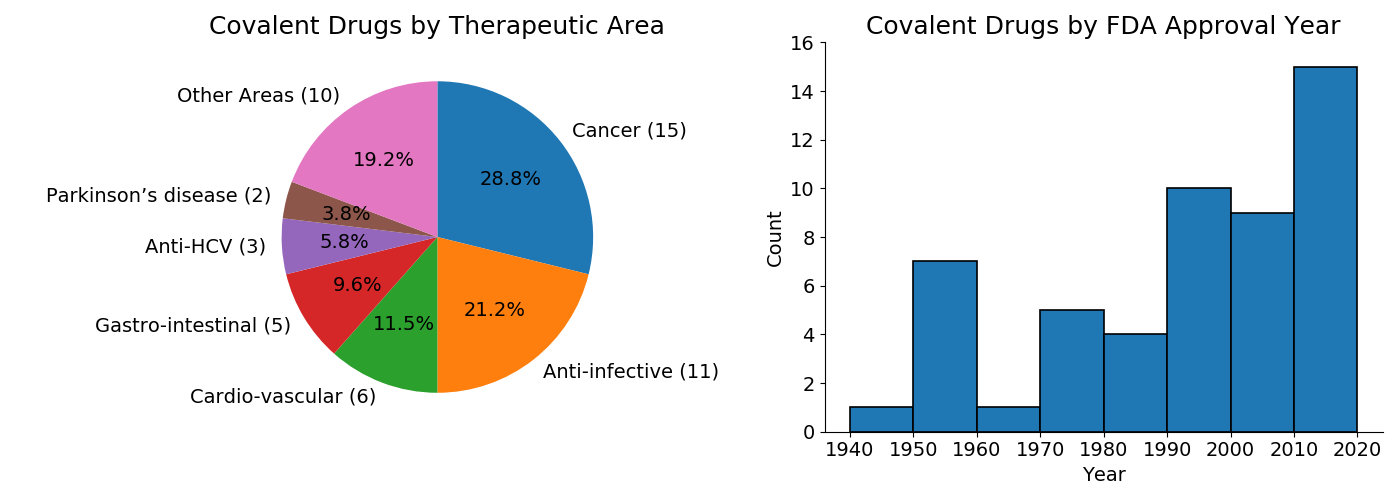

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt  
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5))  
 
bins = [1940+i*10 for i in range(9)]
years = df['Approval Year']
axs[1].hist(years, bins, density=False, histtype='bar', rwidth=1, edgecolor='black', linewidth=1.2) 
axs[1].set_title('Covalent Drugs by FDA Approval Year', fontdict={'fontsize': 18, 'fontweight' : 10})  
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False) 
axs[1].set_ylabel('Count', fontsize=14)
axs[1].set_yticks(list(range(0,17,2)))
axs[1].set_yticklabels(list(range(0,17,2)), fontsize= 14)  
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_xticklabels([1930+i*10 for i in range(10)], fontsize= 14)

#ax.yaxis.set_label_coords(-0.07,1)
#ax.xaxis.set_label_coords(0.97,-0.07) 

area = df['Therapeutic Area'].value_counts()
draw_dict = area.to_dict()   
total_num = sum(draw_dict.values())
draw_dict = {i:j for i,j in draw_dict.items() if j/total_num>=0.02}

if total_num > sum(draw_dict.values()): 
    draw_dict.update({'Other Areas':total_num-sum(draw_dict.values())})
    
patches, texts, autotexts = axs[0].pie(draw_dict.values(), textprops={'fontsize': 14},
                                   labels=[f'{i} ({j})' for i, j in draw_dict.items()], 
                                   autopct='%1.1f%%', pctdistance=0.6, startangle=90, 
                                   radius=1., counterclock=False)
 
axs[0].set_title(f"Covalent Drugs by Therapeutic Area", fontsize=18)   
fig.tight_layout() 
plt.show()  